<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 5.4 MB/s eta 0:00:00


In [2]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 49.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826129 sha256=a7274d619a8c0ff9faf3d0620998b18be6a0c20beaa2bac9457c58120af4a865
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9436735 sha256=b11efa8e81db6290192ed42e1303b83a571f9b7b163645e60a1c11b218f82e2a
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988

In [3]:
import pyupbit

In [34]:

import pyupbit
import pandas as pd
import time

# Upbit API로 데이터 가져오기
df = pyupbit.get_ohlcv("KRW-BTC", interval="minute15", count=410)

# 인덱스를 날짜/시간 형식으로 변환
df.index = pd.to_datetime(df.index, format="%Y-%m-%d %H:%M:%S")

# 데이터프레임 출력
print(df)

                           open        high         low       close  \
2023-04-19 00:15:00  39412000.0  39483000.0  39400000.0  39470000.0   
2023-04-19 00:30:00  39483000.0  39608000.0  39433000.0  39479000.0   
2023-04-19 00:45:00  39479000.0  39538000.0  39430000.0  39497000.0   
2023-04-19 01:00:00  39497000.0  39594000.0  39470000.0  39578000.0   
2023-04-19 01:15:00  39579000.0  39579000.0  39516000.0  39538000.0   
...                         ...         ...         ...         ...   
2023-04-23 05:30:00  36954000.0  36954000.0  36921000.0  36940000.0   
2023-04-23 05:45:00  36940000.0  36943000.0  36863000.0  36864000.0   
2023-04-23 06:00:00  36872000.0  36875000.0  36813000.0  36841000.0   
2023-04-23 06:15:00  36850000.0  36899000.0  36834000.0  36891000.0   
2023-04-23 06:30:00  36891000.0  36974000.0  36891000.0  36965000.0   

                        volume         value  
2023-04-19 00:15:00  51.833338  2.044226e+09  
2023-04-19 00:30:00  36.519046  1.443040e+09  
2023-0

In [35]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2023-04-19 00:15:00,39470000.0
1,2023-04-19 00:30:00,39479000.0
2,2023-04-19 00:45:00,39497000.0
3,2023-04-19 01:00:00,39578000.0
4,2023-04-19 01:15:00,39538000.0
...,...,...
405,2023-04-23 05:30:00,36940000.0
406,2023-04-23 05:45:00,36864000.0
407,2023-04-23 06:00:00,36841000.0
408,2023-04-23 06:15:00,36891000.0


In [36]:
#prophet 불러옴
from fbprophet import Prophet

In [37]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [38]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=8, freq='H')
forecast = model.predict(future)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


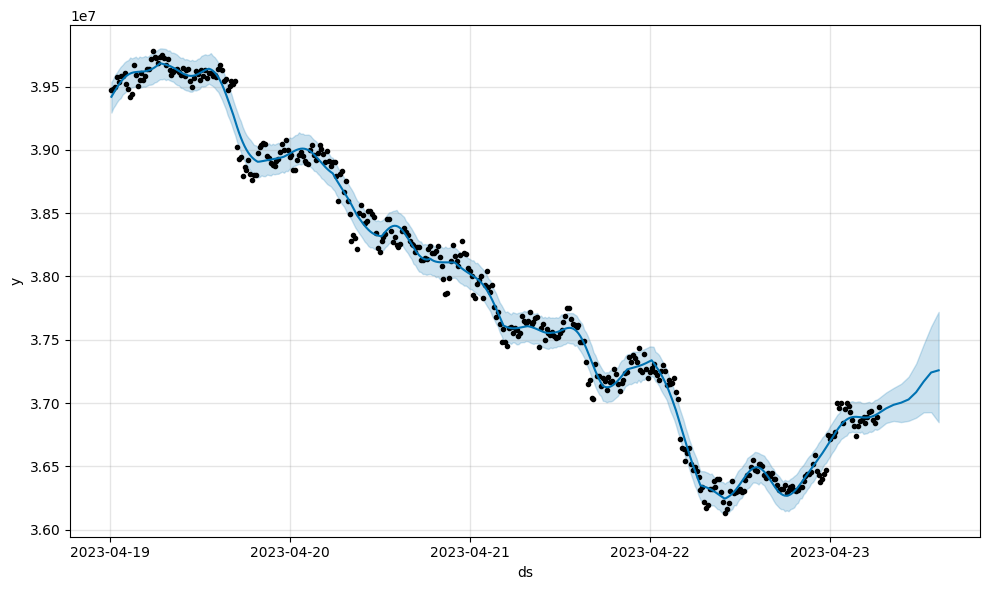

In [39]:
#그래프1
fig1 = model.plot(forecast)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


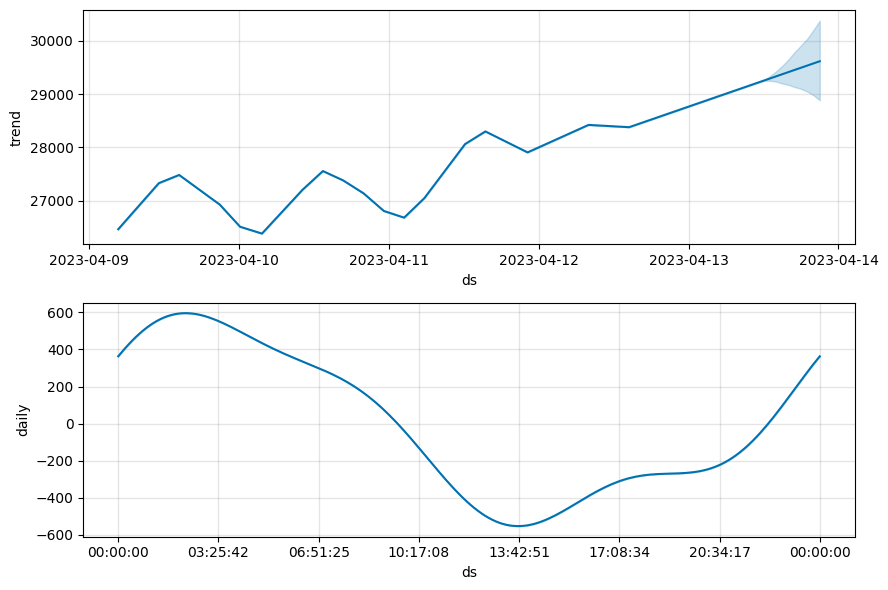

In [ ]:
#그래프2
fig2 = model.plot_components(forecast)

I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive


KeyboardInterrupt: ignored